# Inleiding

In deze opdracht gaan jullie je scripts van vorige week verbeteren en uitbreiden. Dat gezegd, hebben we liever dat je ingeleverd Jupyter Notebook bestanden niet super lang worden, dus in plaats van het toevoegen van nieuwen cellen in jullie bestanden van Opdracht 1, gebruik alsjeblieft deze sjabloon als basis. Dan, in de relevante plekken, alleen de cellen van de vorige opdracht die echt voor deze opdracht nodig zijn kopie/plakken. Bijvoorbeeld, hoewel dataverkenning toch belangrijk is, hebben jullie hopelijk al genoeg daarvan gedaan, en dus is het niet nodig om die code en plotjes hierbij ook te hebben. 

Hier is een lijst van de elementen die je waarschijnlijk willen overdragen:
1. het inlezen/splitsen van jouw datasets
2. de definitieve versie van jouw regressie/classificatie modellen (niet de voorbereiding stappen)
3. blijf dezelfde twee gekozen algoritmes gebruiken

Let op: In tegenstelling tot de eerste opdracht, voor deze en de resterende 2 opdrachten worden jullie peer reviews alleen beoordeeld op een ja of nee basis. 

Zoals geschreven in de vakbeschrijving:

"Het niet op tijd of lui maken van een individuele peer review resulteert in een reductie van 0,5 punt voor het cijfer van de bijhorende opdracht van de reviewer."

Gezien dat jullie peer reviews zijn sowieso kwalitatief beoordeeld voor Opdracht 1, is deze halfpunt reductie alleen voor Opdrachten 2 t/m 4 geldig. 

### Algemene Coderen Conventies

De volgorde van het python script is belangrijk. Zo zorg je bijvoorbeeld altijd dat eerst de benodigde packages worden ingeladen geïnstalleerd en geïmporteerd). Verder is het goed om van tevoren jouw working directory te controleren. 

Schrijf het python script daarom met een duidelijke indeling van met verschillende stappen. Bij elke stap dient toelichting worden gegeven:
1. Wat is het doel van deze stap?
2. Wat is de input van deze stap?
3. Wat is de output van deze stap en waar heb je deze output hierna nog nodig?

Hieronder voorbeelden van de verschillende punten hierboven.

In [ ]:
### Voorbeeld: Standaard Imports
import numpy as np
import matplotlib.pyplot as plt


### Controleer Working Directory
import os
print(os.getcwd())

# Pas je working directory aan indien gewenst
path = 'C:\\Users\\rburrus\\Desktop\\Jupyter Notebook' # zet hier wat voor jou goed is
os.chdir(path)
print(os.getcwd())


### Voorbeeld: Functie met Beschrijving Schrijven

def voorbeeld_functie(parameter1, parameter2 = 2):
    # Doel: dit functie maakt een bepaalde berekening
    # In: parameter1 (float), parameter2 (integer)
    # Uit: parameter1 macht parameter2 (standaard macht 2)
    
    return parameter1 ** parameter2

# Deelopdracht 1/2 - Regressie Model (Huizenprijzen)

Let op: de bedoeling is dat jullie hetzelfde regressie algoritme van Opdracht 1 blijven gebruiken (dus niet een nieuwe). 

### Theorievragen

Kies twee verschillende prestatiemetrics voor jouw gekozen regressie algoritme.
Begin met het beantwoorden van een aantal vragen over deze prestatiemetrics.

1. Waarom heb je deze prestatiemetrics gekozen?

2. Wat zijn de voor- en nadelen van de eerste prestatiemetric?

3. Wat zijn de voor- en nadelen van de tweede prestatiemetric?

#### Beantwoord nu een aantal vragen over hyperparameters voor jouw gekozen regressie algoritme.

4. Welke hyperparameters in je model kun je instellen (aan welke knoppen kan je draaien)? 

5. Leg uit wat een verandering van de waarde met het model doet.

6. Wat zouden logische waarden kunnen zijn?

## Code

Zoals bij Opdracht 1, voor het regressie model kunnen jullie deze dataset gebruiken:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Als je het niet al hebben gedaan, splits je dataset in een train en een test (validatie) set.

### Prestatiemetrics

Bereken 2 prestatiemetrics op de traindata en op de testdata. Zijn er grote verschillen? Zo ja, hoe zou dat kunnen komen?

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"De prestatiemetrics van de modellen zijn berekend. Er wordt toegelicht wat waarde van de metric betekend. Voordelen en nadelen van de gekozen metrics worden benoemd."

Let op: Je kan deze vraag (en soortgelijke vragen hieronder) beantwoorden via zowel aanvullende Markdown cellen (voor tekstuele antwoorden) als Code cellen (voor jouw code zelf, met commentaar erbij). Gebruik gewoon wat je het best helpt om de vraag te beantwoorden. 

(voorbeeld Markdown cell)

In [ ]:
(voorbeeld Code cell)

### K-Fold Cross Validatie

Pas k-fold cross validation toe op de traindataset. Zie ook: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
(beantwoord als Code)

Welke waarde van k kies je en waarom?

(beantwoord als Markdown)

Lijkt het resultaat meer op de train of de testset?

(beantwoord als Markdown)

### Underfit/Overfit

Maak een underfit model (slechte prestaties op train en test) en een overfit model (veel betere prestaties op train vergeleken met test). Leg uit (via tekst en een of meer visualisaties) hoe je dit kan zien.

Let op: je maakt hier expres slechte modellen om te zien hoe veel controle over het presteren van het model je kan krijgen en te leren wat de verschillende hyperparameters kunnen opleveren. 

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Het is gelukt om een underfit- een overfitmodel te maken en er wordt duidelijk uitgelegd waaraan je dat kan zien. De rol van de train en testset wordt duidelijk uitgelegd. De resultaten worden onderbouwd met goede vizualisaties."

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

### Gridsearch

Pas GridSearchCV() toe op je model in scikit-learn, hiermee kan je de beste waarde voor je hyperparameters vinden. Let op: voor maximale punten moet je ook K-Fold Cross Validatie tegelijk gebruiken (wss in een pipeline...zie DataCamp).

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is GridSearchCV() uitgevoerd en er wordt beargumenteerd waarom gekozen is voor bepaalde hyperparameters. Ook wordt benoemd welke hyperparameter uiteindelijk het beste lijkt te zijn en waarom, en er is besproken hoe k-foldcross validatie betrokken wordt in de GridSearchCV()."

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

### Definitief Model (Regressie)

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er worden uitspraken gedaan over hoe goed de modellen werken. De onderbouwing is duidelijk en logisch. Ook is beargumenteerd waarom het model niet under- en overfit. Daarnaast komt naar voren waarom bepaalde features wel en niet in het uiteindelijke model zitten."

Test het model met de beste parameters op de testset. Hoe goed is het model?

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

Upload de voorspelling naar Kaggle. Is de score volgens verwachting?

(beantwoord als Markdown)

# Deelopdracht 2/2 - Classificatie Model (Borstkanker)

Let op: de bedoeling is dat jullie hetzelfde classificatie algoritme van Opdracht 1 blijven gebruiken (dus niet een nieuwe). 

### Theorievragen

Kies twee verschillende prestatiemetrics voor jouw gekozen classificatie algoritme.
Begin met het beantwoorden van een aantal vragen over deze prestatiemetrics.

1. Waarom heb je deze prestatiemetrics gekozen?

* Confusion Matrix: met een confusion matrix krijg je een overzichtelijk plaatje van alle correct- en incorrecte voorspellingen.
* Recall: ik wil alle patienten met borstkanker kunnen detecteren.

2. Wat zijn de voor- en nadelen van de eerste prestatiemetric?

Voordelen:
- Het geeft veel informatie, met de waardes uit de confusion matrix kun je ook de uitkomst van andere prestatiemetrics achterhalen. (Zoals Accuracy, Precision en F1 Score)
- Je kan het importeren als package, je hoeft dus zelf niet veel code hiervoor te schrijven.

Nadelen:
- De hoeveelheid informatie kan overweldigend zijn voor iemand die niet bekend is met een confusion matrix.
- De assen (Predicted & Actual values) kunnen soms omgedraaid zijn en dat kan tot verwarring brengen.

3. Wat zijn de voor- en nadelen van de tweede prestatiemetric?

Voordelen:
- Je kan het importeren als package, je hoeft dus zelf niet veel code hiervoor te schrijven.
- Het is 1 getal, in dit geval is het aantal correcte voorspellingen van borstkankerpatienten vergeleken met het werkelijke aantal borstkankerpatienten.

Nadelen:
- Het zegt niks over de naukeurigheid, de algoritme kan ook aangeven dat iemand borstkanker heeft terwijl diegene het niet heeft.

#### Beantwoord nu een aantal vragen over hyperparameters voor jouw gekozen classificatie algoritme.

4. Welke hyperparameters in je model kun je instellen (aan welke knoppen kan je draaien)? 

5. Leg uit wat een verandering van de waarde met het model doet.

6. Wat zouden logische waarden kunnen zijn?

## Code

Zoals bij Opdracht 1, voor het classificatie model kunnen jullie deze dataset gebruiken:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Als je het niet al hebben gedaan, splits je dataset in een train en een test (validatie) set.

### Prestatiemetrics

Bereken 2 prestatiemetrics op de traindata en op de testdata. Zijn er grote verschillen? Zo ja, hoe zou dat kunnen komen?

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"De prestatiemetrics van de modellen zijn berekend. Er wordt toegelicht wat waarde van de metric betekend. Voordelen en nadelen van de gekozen metrics worden benoemd."

Let op: Je kan deze vraag (en soortgelijke vragen hieronder) beantwoorden via zowel aanvullende Markdown cellen (voor tekstuele antwoorden) als Code cellen (voor jouw code zelf, met commentaar erbij). Gebruik gewoon wat je het best helpt om de vraag te beantwoorden. 

## Confusion Matrix met Train dataset:
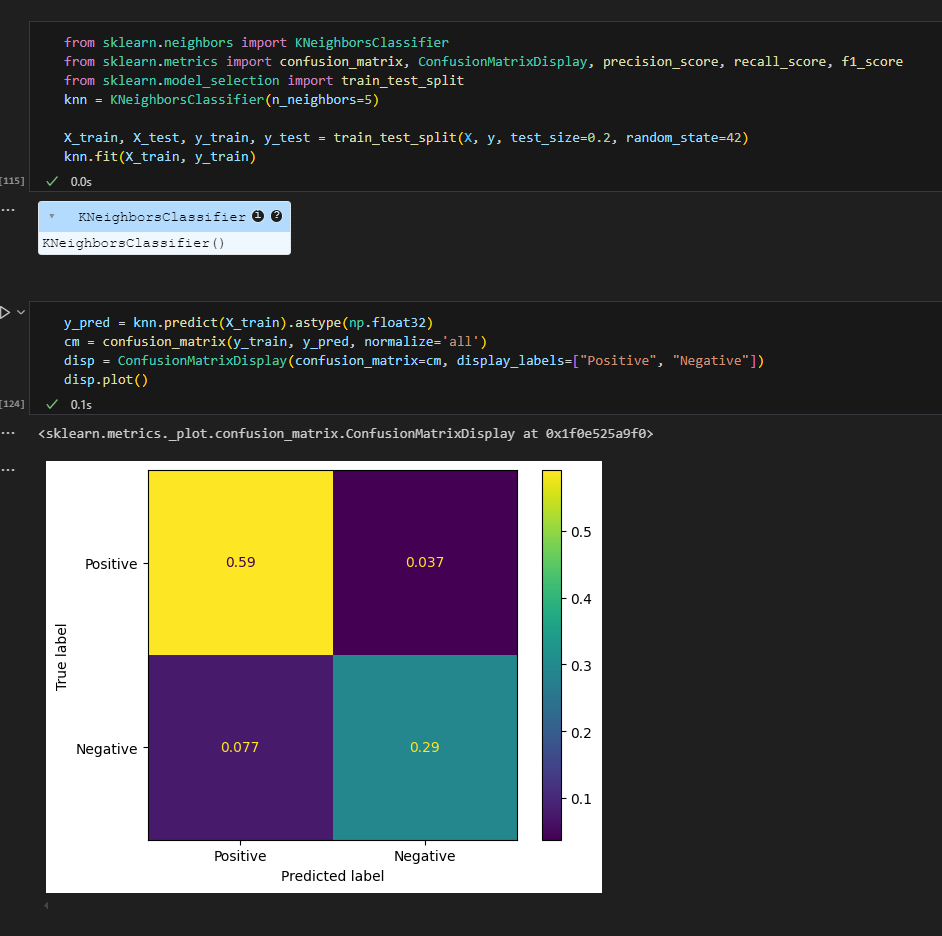

## Uitkomst:
* True Positive: 59%
* True Negative: 29%
* False Positive: 7.7%
* False Negative: 3.7%

## Recall:    0.7929

## Confusion Matrix met Test dataset:
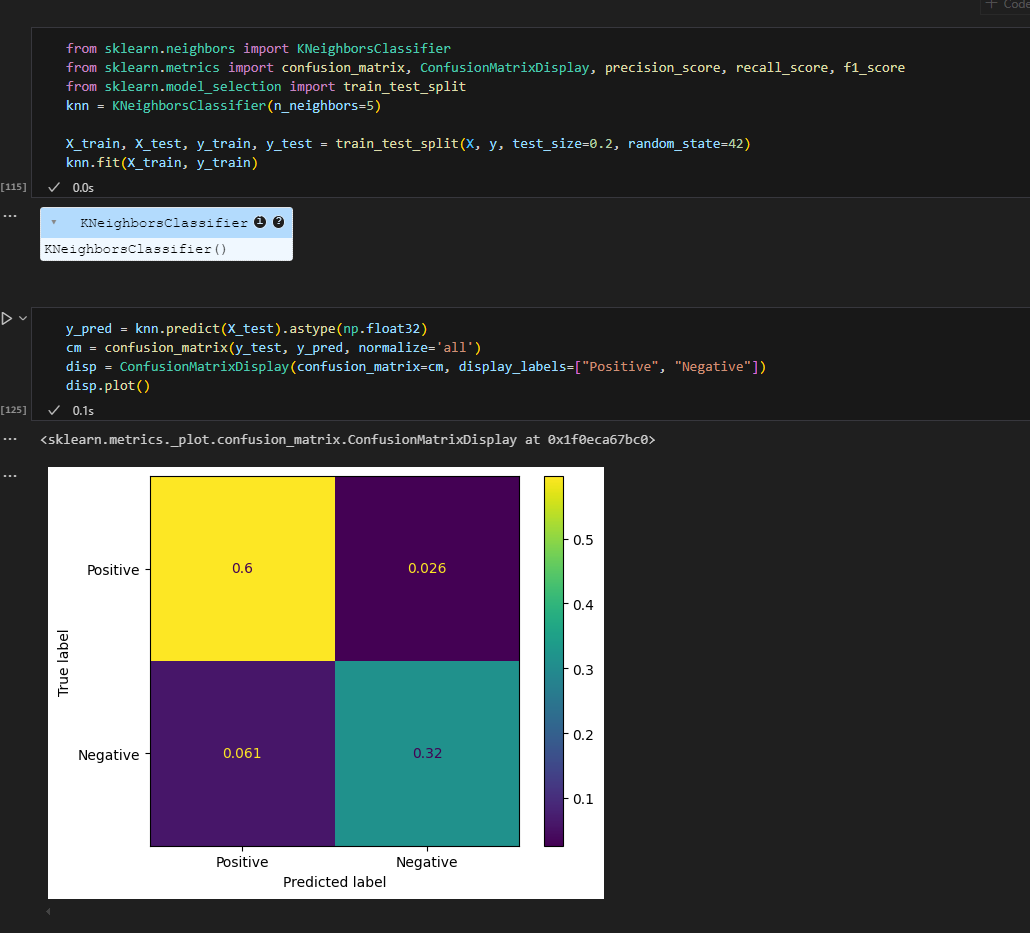

## Uitkomst:
* True Positive: 60%
* True Negative: 32%
* False Positive: 6.1%
* False Negative: 2.6%

## Recall:    0.8372

Het verschil tussen de uitkomsten van de prestatiemetrics van train en test datasets zijn in ons geval niet heel groot.

### K-Fold Cross Validatie

Pas k-fold cross validation toe op de traindataset. Zie ook: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
(beantwoord als code)

Welke waarde van k kies je en waarom?

(beantwoord als Markdown)

Lijkt het resultaat meer op de train of de testset?

(beantwoord als Markdown)

### Underfit/Overfit

Maak een underfit model (slechte prestaties op train en test) en een overfit model (veel betere prestaties op train vergeleken met test). Leg uit (via tekst en een of meer visualisaties) hoe je dit kan zien. 

Let op: je maakt hier expres slechte modellen om te zien hoe veel controle over het presteren van het model je kan krijgen en te leren wat de verschillende hyperparameters kunnen opleveren. 

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Het is gelukt om een underfit- een overfitmodel te maken en er wordt duidelijk uitgelegd waaraan je dat kan zien. De rol van de train en testset wordt duidelijk uitgelegd. De resultaten worden onderbouwd met goede vizualisaties."

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

### RandomizedSearch

Pas RandomizedSearchCV() toe op je model in scikit-learn, hiermee kan je de beste waarde voor je hyperparameters vinden. RandomizedSearchCV is een andere methode dan GridSearch. Zie hier voor meer informatie: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Let op: voor maximale punten moet je ook K-Fold Cross Validatie tegelijk gebruiken (wss in een pipeline...zie DataCamp).

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is RandomizedSearchCV() uitgevoerd en er wordt beargumenteerd waarom gekozen is voor bepaalde hyperparameters. Ook wordt benoemd welke hyperparameter uiteindelijk het beste lijkt te zijn en waarom, en er is besproken hoe k-foldcross validatie betrokken wordt in de RandomizedSearchCV()."

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)

### Definitief Model (Classificatie)

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er worden uitspraken gedaan over hoe goed de modellen werken. De onderbouwing is duidelijk en logisch. Ook is beargumenteerd waarom het model niet under- en overfit. Daarnaast komt naar voren waarom bepaalde features wel en niet in het uiteindelijke model zitten."

Test het model met de beste parameters op de testset. Hoe goed is het model?

In [ ]:
(beantwoord als code)

(beantwoord als Markdown)